## Part 3 Decision Tree

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.tree import plot_tree
import scipy

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

folder_dir = './cifar-10-batches-py/' 

load cifar data

In [28]:

import numpy as np
folder_dir = './cifar-10-batches-py/' 
metadata_dict = unpickle(folder_dir+"batches.meta")
label_names = np.array([label.decode('ascii') for label in metadata_dict[b'label_names']])

cifar_train_data = None
cifar_train_filenames = []
cifar_train_labels = []

for i in range(1,6):
    cifar_train_data_dict = unpickle(folder_dir + "data_batch_" + str(i))
    if i == 1:
        cifar_train_data = cifar_train_data_dict[b'data']
    else:
        cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
    cifar_train_labels += cifar_train_data_dict[b'labels']

cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))

cifar_test_data_dict = unpickle(folder_dir + "test_batch")
cifar_test_data = cifar_test_data_dict[b'data']
cifar_test_filenames = cifar_test_data_dict[b'filenames']
cifar_test_labels = cifar_test_data_dict[b'labels']

cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))

cifar_train_data = cifar_train_data.reshape(50000, -1)
cifar_test_data = cifar_test_data.reshape(10000, -1)
print(cifar_train_data.shape)
print(cifar_test_data.shape)

(50000, 3072)
(10000, 3072)


rescaling from [0,255] to [-1,1]

In [29]:
X_train = cifar_train_data/127.5-1
X_test = cifar_test_data/127.5-1
y_train = np.array(cifar_train_labels)
y_test = np.array(cifar_test_labels)
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)
print("y_train.shape", y_train.shape)

X_train.shape (50000, 3072)
X_test.shape (10000, 3072)
y_test.shape (10000,)
y_train.shape (50000,)


Instantiate the Decision Tree model

In [30]:
tree = sklearn.tree.DecisionTreeClassifier()

Train the DecisionTree model

In [31]:
param_distribution = {'max_depth': range(1,50), 'min_samples_split': range(2,50)}

best_tree = sklearn.model_selection.RandomizedSearchCV(tree, param_distribution, n_iter=70, cv=2, random_state=0, verbose=3).fit(X_train, y_train)
    
print('best Hyperparameters = ' + str(best_tree.best_params_))


Fitting 2 folds for each of 70 candidates, totalling 140 fits
[CV 1/2] END max_depth=14, min_samples_split=44;, score=0.281 total time= 1.1min
[CV 2/2] END max_depth=14, min_samples_split=44;, score=0.283 total time= 1.2min
[CV 1/2] END max_depth=10, min_samples_split=12;, score=0.280 total time=  56.1s
[CV 2/2] END max_depth=10, min_samples_split=12;, score=0.285 total time=  56.0s
[CV 1/2] END max_depth=44, min_samples_split=32;, score=0.270 total time= 1.3min
[CV 2/2] END max_depth=44, min_samples_split=32;, score=0.271 total time= 1.4min
[CV 1/2] END ..max_depth=7, min_samples_split=3;, score=0.279 total time=  35.6s
[CV 2/2] END ..max_depth=7, min_samples_split=3;, score=0.275 total time=  32.9s
[CV 1/2] END .max_depth=39, min_samples_split=5;, score=0.251 total time= 1.2min
[CV 2/2] END .max_depth=39, min_samples_split=5;, score=0.254 total time= 1.5min
[CV 1/2] END max_depth=17, min_samples_split=44;, score=0.274 total time= 1.1min
[CV 2/2] END max_depth=17, min_samples_split=44

Testing the DecisionTree model

In [32]:
print(best_tree.score(X_test, y_test))

0.3092


Saving the model

In [44]:
import pickle
Part_3_Decision_tree = {'model':best_tree}

with open('Part_3_Decision_tree.dictionary', 'wb') as config_dictionary_file:
    pickle.dump(Part_3_Decision_tree, config_dictionary_file)

Plotting the DecisionTree

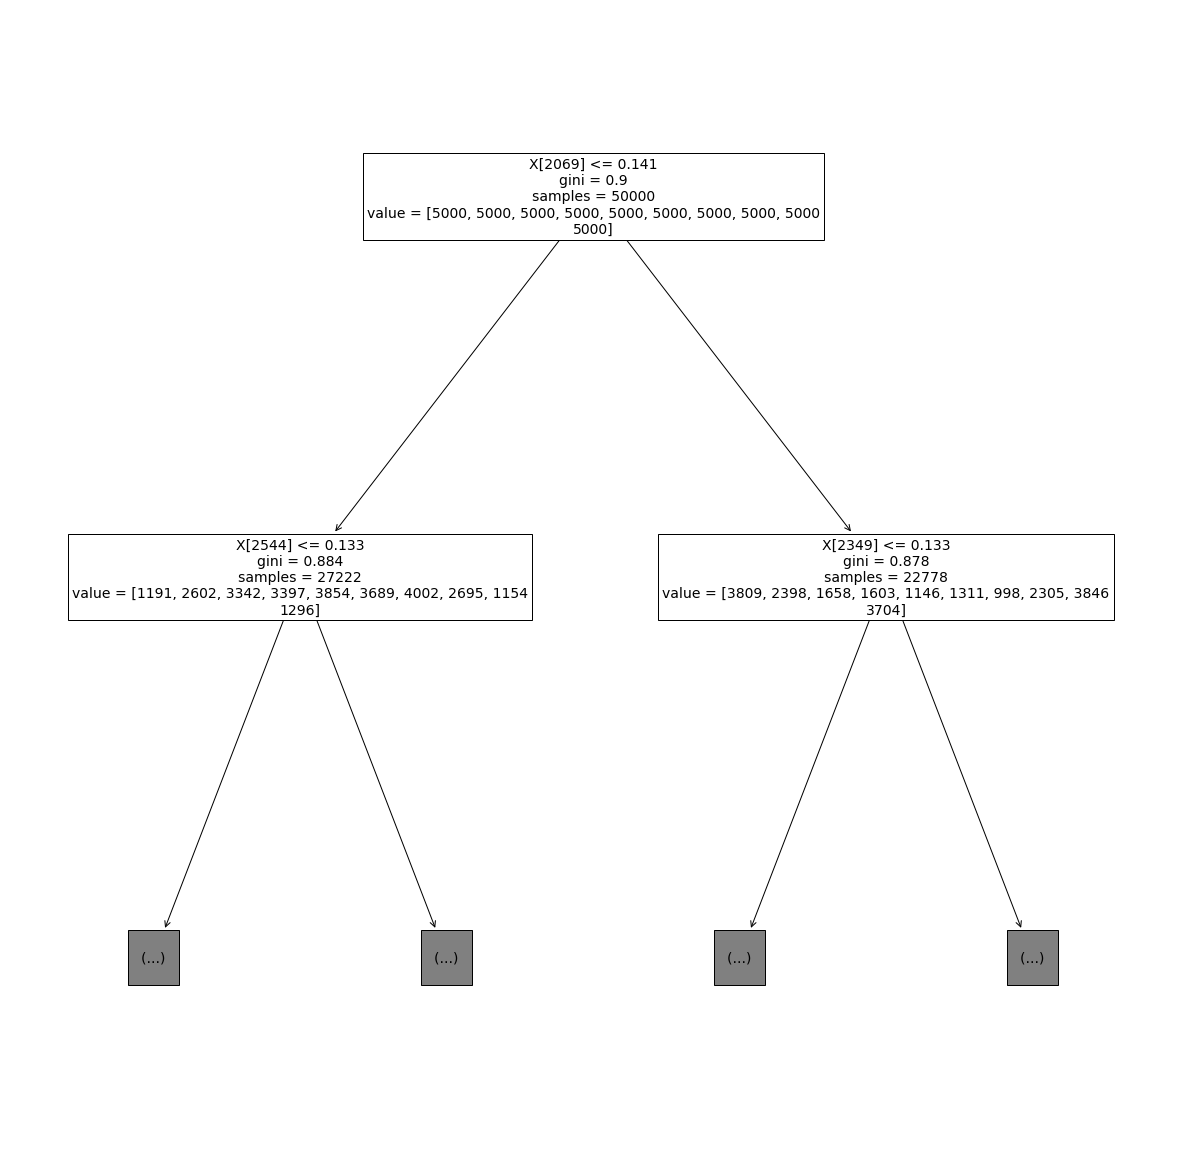

In [38]:
plt.figure(figsize=(21,21))
plot_tree(best_tree.best_estimator_, max_depth = 1, fontsize=14);